In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import LiquidCrystalHelper as lch

from importlib import reload

In [29]:
reload(lch)

<module 'LiquidCrystalHelper' from 'C:\\Users\\lucas\\Documents\\Grad Work\\Summer Research 2020\\LiquidCrystalHelper.py'>

In [30]:
%matplotlib inline
dpi = 500
mpl.rcParams['figure.dpi'] = dpi

### First generate a domain

In [41]:
l = 5
n = 1000

x = np.linspace(-l, l, num=n)
y = np.linspace(-l, l, num=n)
X, Y = np.meshgrid(x, y)

### Then generate $S$ and $\varphi$ values for a tactoid

In [42]:
ctr = [2, 1]
r = 2
m = 2

S, phi = lch.makeTactoid(ctr, r, m, X, Y)

### Make a uniaxial $Q$-tensor from these $S$ and $\varphi$ values

In [43]:
Q = lch.uniaxialQ(S, phi)

### Generate $\eta, \mu, \nu$ from $Q$

In [44]:
eta, mu, nu = lch.auxVars(Q)

### Make sparse index matrix

In [45]:
sparse_shape = (15, 15)
sparse_idx = lch.sparseIdx(X.shape, sparse_shape)

### Calculate the maximal eigenvalues for the sparse $Q$ matrix

In [46]:
lambda_pm = lch.calcQEigenvals(eta[sparse_idx], mu[sparse_idx], nu[sparse_idx])

### Calculate the corresponding masked eigenvectors

In [47]:
S_cutoff = 0.2

U, V = lch.calcQEigenvecs(eta[sparse_idx], mu[sparse_idx], 
                          nu[sparse_idx], lambda_pm, S_cutoff)

### Plot it

(-5.0, 5.0, -5.0, 5.0)

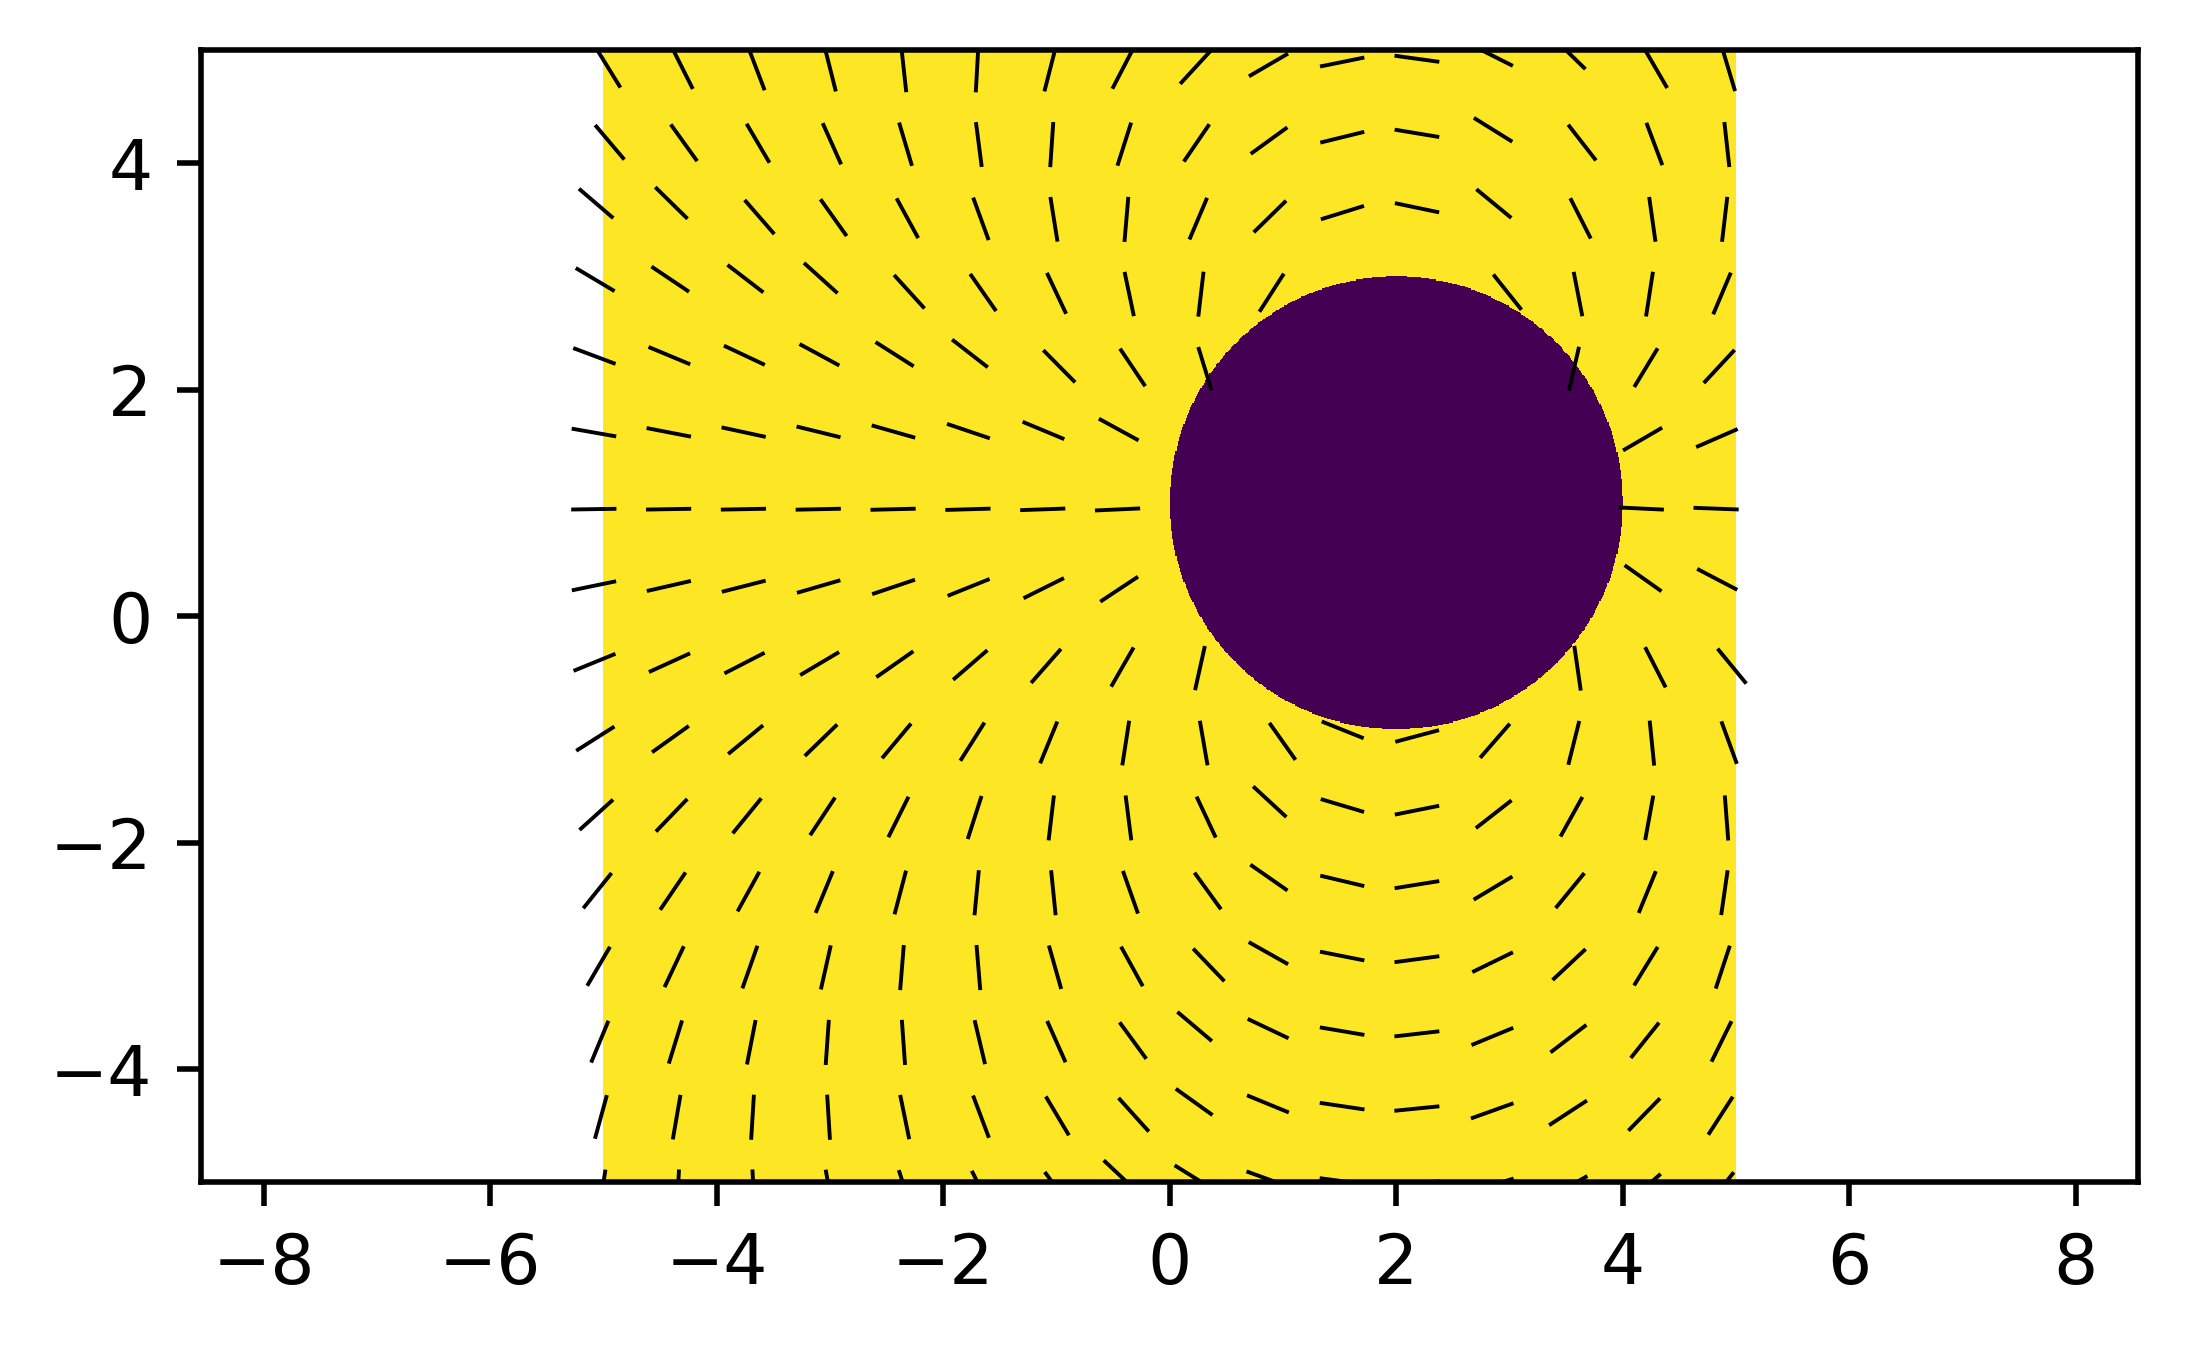

In [48]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.pcolor(X, Y, S)
q = ax.quiver(X[sparse_idx], Y[sparse_idx], U, V, headwidth=0, pivot='middle', headaxislength=5, scale=30, width=0.002)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
ax.axis('equal')

### Try to do it again for a -1 director field

(-5.0, 5.0, -5.0, 5.0)

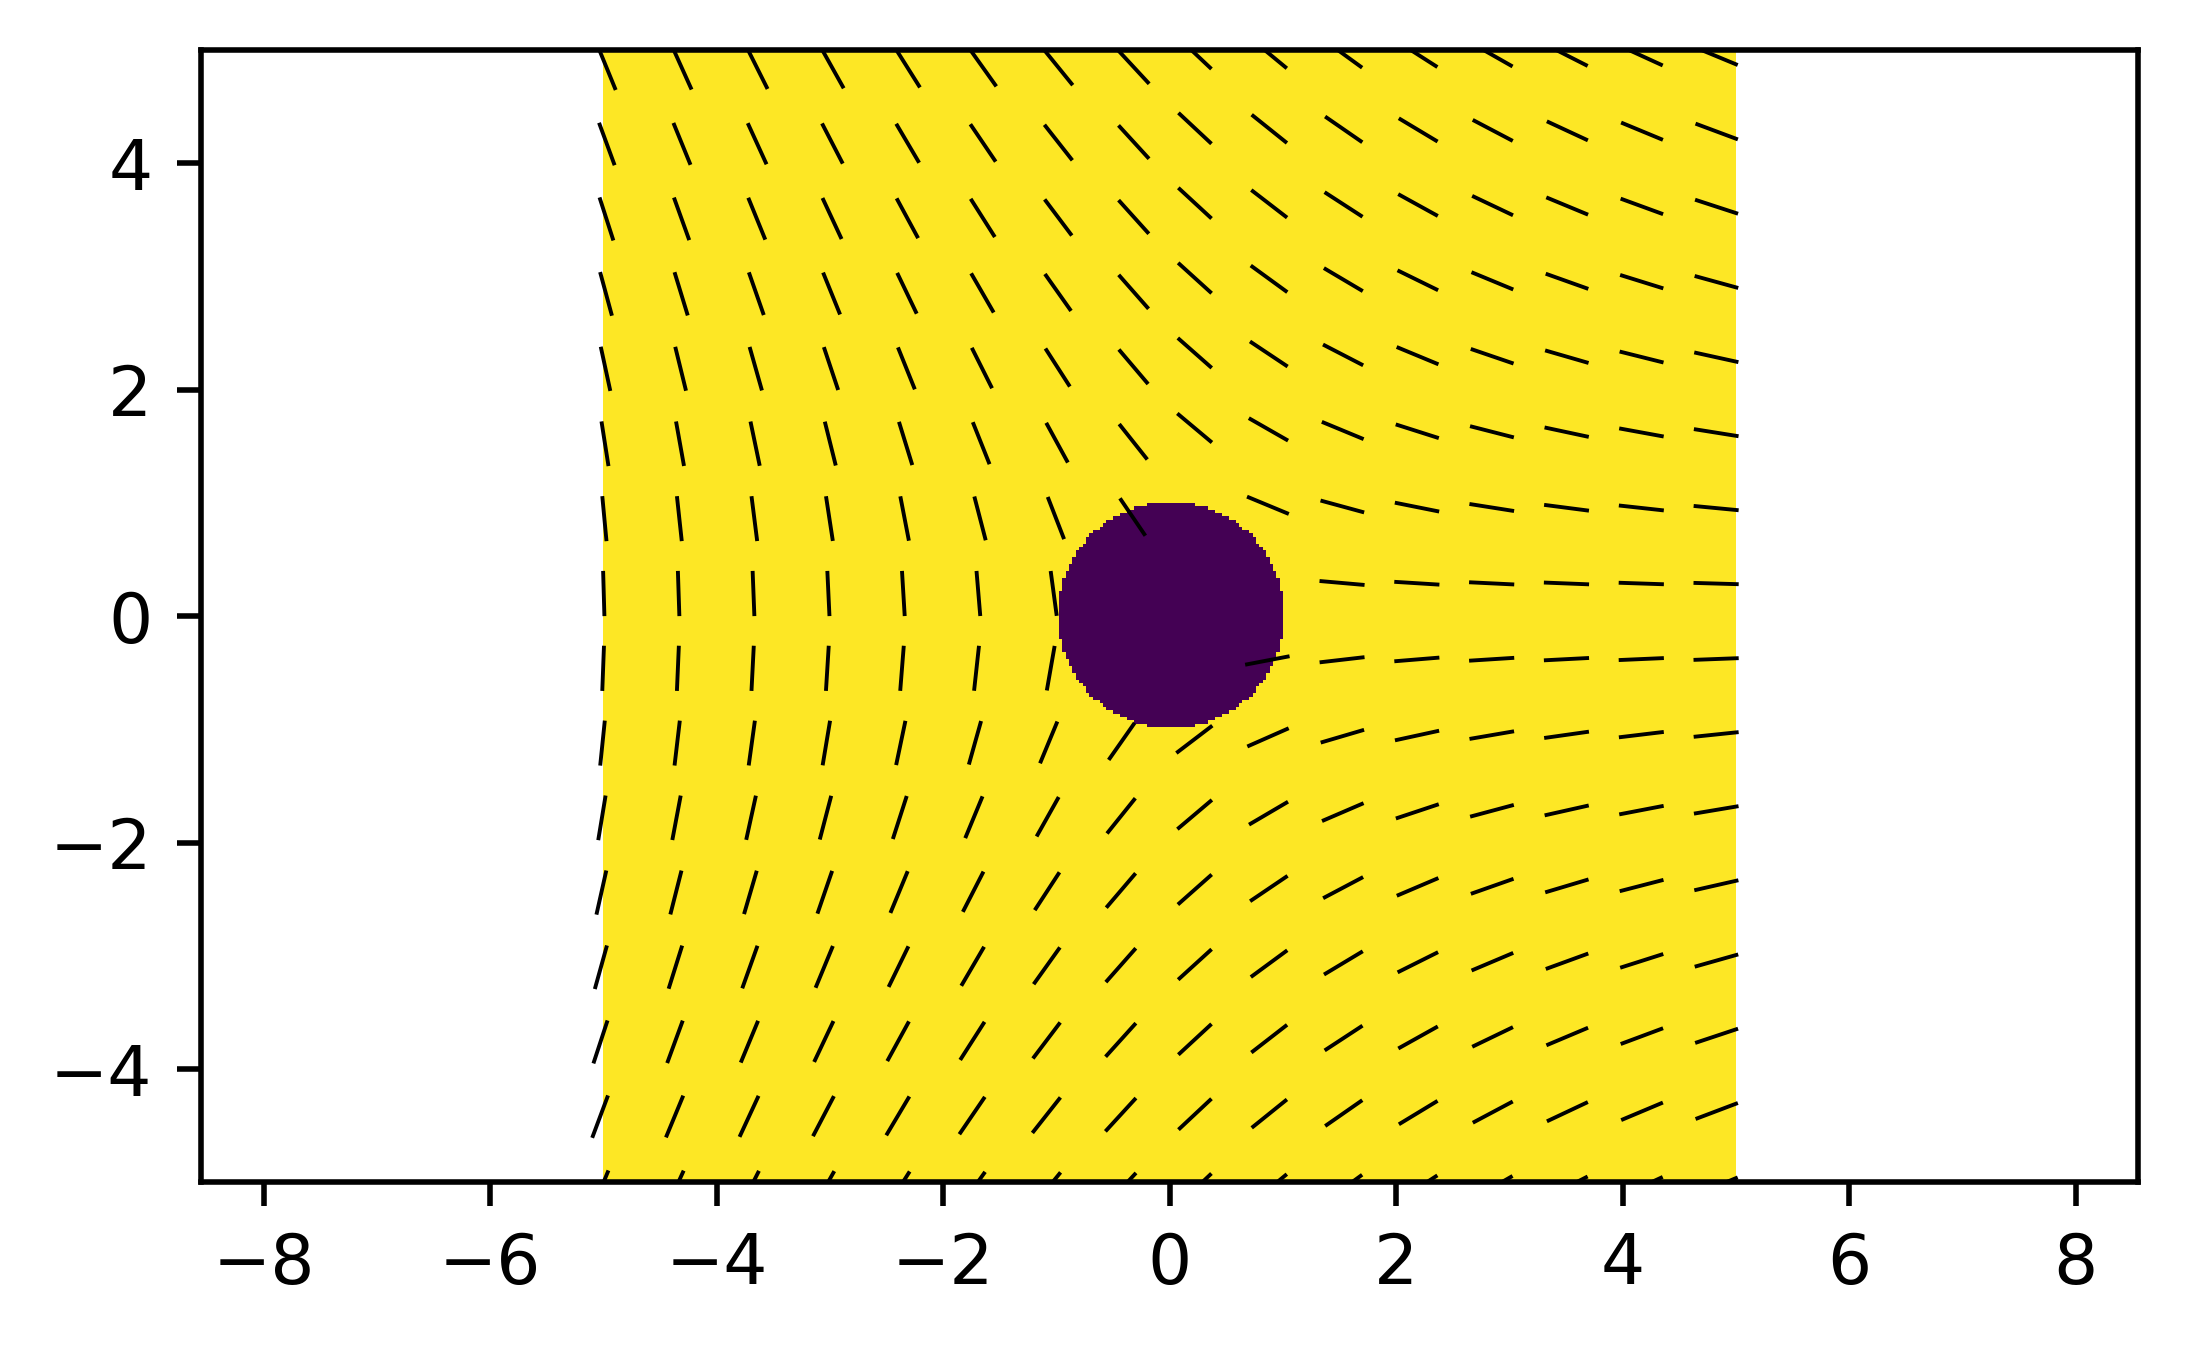

In [39]:
ctr = [0, 0]
r = 1
m = -1/2

S, phi = lch.makeTactoid(ctr, r, m, X, Y)
Q = lch.uniaxialQ(S, phi)
eta, mu, nu = lch.auxVars(Q)

sparse_shape = (15, 15)
sparse_idx = lch.sparseIdx(X.shape, sparse_shape)
lambda_pm = lch.calcQEigenvals(eta[sparse_idx], mu[sparse_idx], nu[sparse_idx])

S_sparse_shape = (300, 300)
S_sparse_idx = lch.sparseIdx(S.shape, S_sparse_shape)

S_cutoff = 0.1

U, V = lch.calcQEigenvecs(eta[sparse_idx], mu[sparse_idx], 
                          nu[sparse_idx], lambda_pm, S_cutoff)

fig, ax = plt.subplots(figsize=(5, 3))
ax.pcolor(X[S_sparse_idx], Y[S_sparse_idx], S[S_sparse_idx])
q = ax.quiver(X[sparse_idx], Y[sparse_idx], U, V, headwidth=0, pivot='middle', headaxislength=5, scale=30, width=0.002)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
ax.axis('equal')

### Two things we might consider doing:
1. Rewrite the `sparseIdx` function so that it does a better job of centering.
2. Write some more functions to give Q-tensor starting configurations (Cody has one and Svensek and Zumer have another)

### Next big task is writing forward Euler scheme for just LdG energy